In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

In [ ]:
pathSmic='./evolutiondusmic/valeurs_annuelles.csv'

In [ ]:
pathConso='./indicedesprixalaconsomation/valeurs_mensuelles.csv'

Supprime les 3 premières lignes des data

In [ ]:
df_evolutionSmic = pd.read_csv(pathSmic, sep=';',skiprows=3)

In [ ]:
df_consomation = pd.read_csv(pathConso, sep=';',skiprows=3)

Renomage des entêtes

In [ ]:
df_evolutionSmic.rename(columns={"Période":"periode","Unnamed: 1": "indice_smic", "Unnamed: 2": "codes"}, inplace=True)

In [ ]:
df_consomation.rename(columns={"Période":"periode","Unnamed: 1": "indice_prix_consomation", "Unnamed: 2": "codes"}, inplace=True)

Converstion des dates en Datetime

In [ ]:
df_consomation['periode'] = pd.to_datetime(df_consomation['periode'])

Converstion des dates en année

In [ ]:
df_consomation['periode'] = df_consomation['periode'].dt.strftime('%Y')

Faire la moyenne pour chaque année

In [ ]:
df_consomation_average = df_consomation.groupby(['periode']).mean()
df_consomation_average.reset_index(inplace=True)

Fonctions pour transformer les valeur en pourcentage en fonction de l'année de référence.

In [ ]:
def percentageSmic(x):
  return ((x/147.5) - 1)*100

In [ ]:
def percentageAverage(x):
  return ((x/98.8) - 1)*100

Appliquer les fonctions sur les indices des deux dataframes

In [ ]:
SmicBar = sorted(df_evolutionSmic['indice_smic'].apply(percentageSmic))

In [ ]:
ConsoBar = df_consomation_average['indice_prix_consomation'].apply(percentageAverage)

Période de référence

In [ ]:
periode = df_consomation_average['periode']

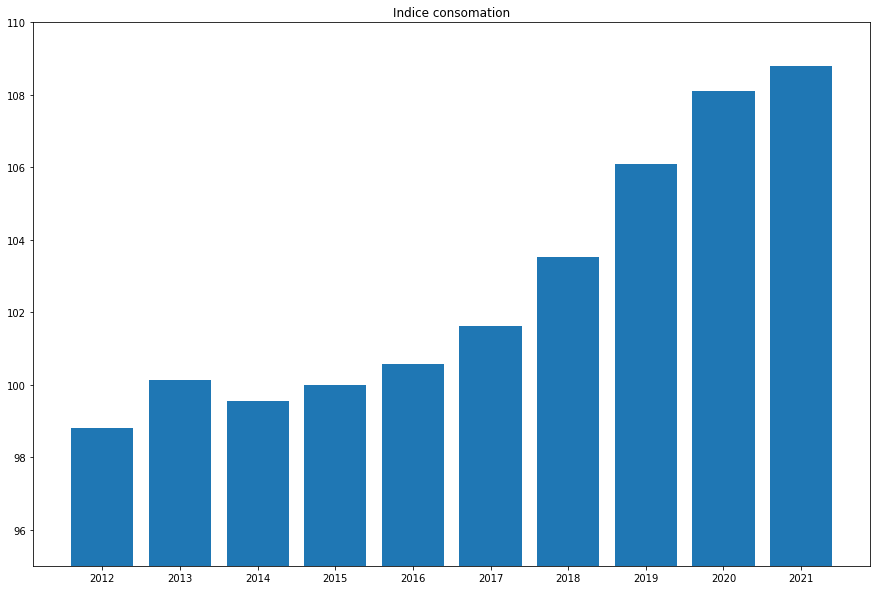

In [ ]:
plt.bar(periode, df_consomation_average['indice_prix_consomation'])
plt.ylim((95,110))
plt.savefig('indice_consomation.png')
plt.title("Indice consomation")
plt.show()

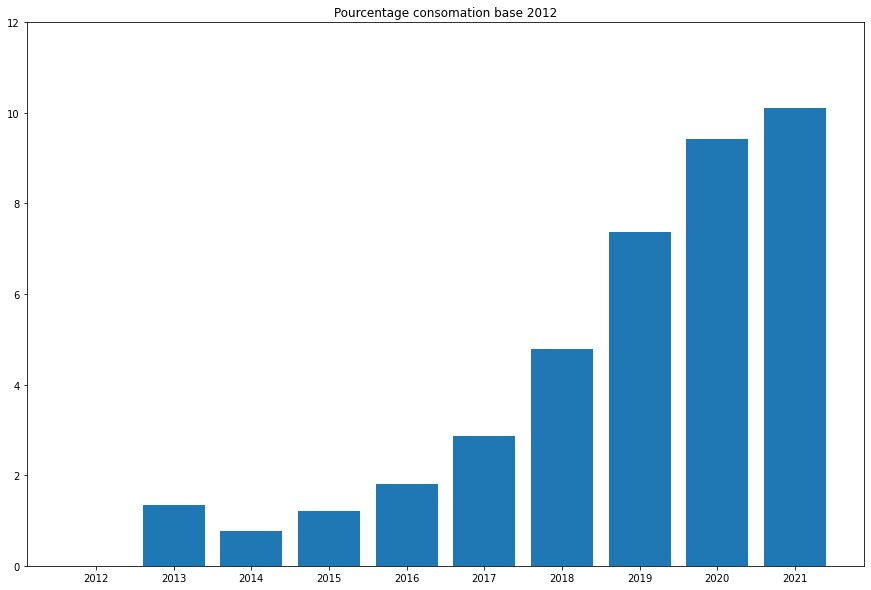

In [ ]:
plt.bar(periode, ConsoBar)
plt.ylim((0,12))
plt.title("Pourcentage consomation base 2012")
plt.savefig('pourcentage_consomation.png')
plt.show()

Graph des deux dataframe en un pour visualiser les données et évolution

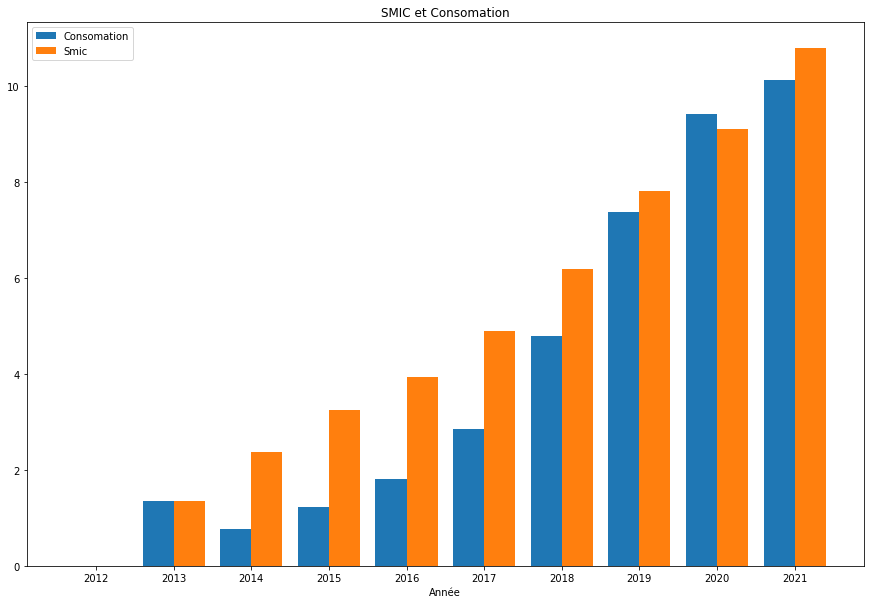

In [ ]:
X_axis = np.arange(len(periode))
plt.bar(X_axis - 0.2, ConsoBar, 0.4, label = 'Consomation')
plt.bar(X_axis + 0.2, SmicBar, 0.4, label = 'Smic')
plt.xticks(X_axis, periode)
plt.xlabel("Année")
plt.legend()
plt.title("Évolution du SMIC et Consomation")
plt.savefig('comparaison.png')
plt.show()

Autre jeux de donnée

In [ ]:
pathSmicEvolution='./smic.xlsx'

In [ ]:
df_Smic = pd.read_excel(pathSmicEvolution)
df_Smic.drop(df_Smic.tail(6).index,inplace=True) 
df_Smic.drop(df_Smic.head(3).index,inplace=True) 

In [ ]:
df_Smic.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 5','Unnamed: 6','Unnamed: 7'], axis=1,inplace=True) 

In [ ]:
df_Smic.rename(columns={"Salaire minimum interprofessionnel de croissance (Smic)":"annee","Unnamed: 3":"smic_horaire","Unnamed: 4": "smic_mensuel"}, inplace=True)

In [ ]:
df_Smic

,annee,smic_horaire,smic_mensuel
3,2022,10.85,1645.58
4,2022,10.57,1603.12
5,2021,10.48,1589.47
6,2021,10.25,1554.58
7,2020,10.15,1539.42
...,...,...,...
73,1980,///,///
74,1980,///,///
75,1980,///,///
76,1980,///,///


In [ ]:
df_newSmic = df_Smic.loc[df_Smic['annee'] >= 2012]
df_newSmic.loc[df_newSmic['annee'] >= 2012]

,annee,smic_horaire,smic_mensuel
3,2022,10.85,1645.58
4,2022,10.57,1603.12
5,2021,10.48,1589.47
6,2021,10.25,1554.58
7,2020,10.15,1539.42
8,2019,10.03,1521.22
9,2018,9.88,1498.47
10,2017,9.76,1480.27
11,2016,9.67,1466.62
12,2015,9.61,1457.52


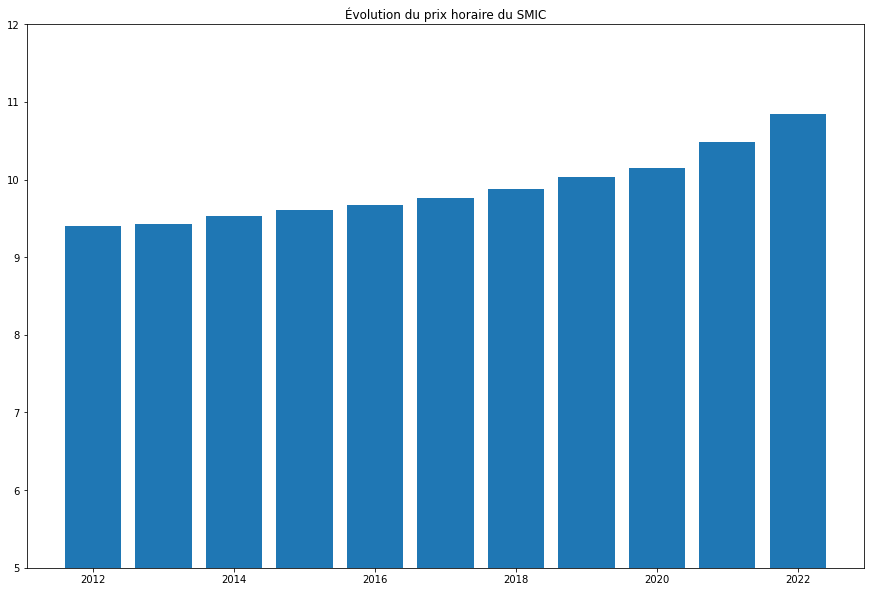

In [ ]:
plt.bar(df_newSmic.loc[df_newSmic['annee'] >= 2012]['annee'], df_newSmic['smic_horaire'])
plt.ylim((5,12))
plt.title("Évolution du prix horaire du SMIC")
plt.savefig('smic_horaire.png')
plt.show()